In [4]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
import os
import scipy.constants as sc
rcParams['figure.figsize'] = (5,2)

In [5]:
direc = '/data/jhyl3/vel_fits/3-5cm_radial'
contents = sorted(os.listdir(direc))
color = cm.viridis(np.linspace(1, 0, len(contents)))

P = 300
r_in = 1 # disc inner radius in au
r_out = 100 # disc outer radius in au
R_grid = np.logspace(np.log10(r_in), np.log10(r_out), P+1)
N = 300
z = np.linspace(0,10,N+1)

In [11]:
R = np.arange(10,110,10)
c_s = 1.5 * R**(-0.25) # in km/s
Omega = (np.sqrt(sc.G * 2e30) * 1.5e11**(-1.5)) * R**(-1.5)
sdot = 2e-12 * (R/10)**(-1.5) # in g/cm2/s
sd = 30 * (1/R) # in g/cm2
rhos = 3.5 # in g/cm3
H = c_s / (1.5e8) / Omega # in au
H_R = c_s / Omega / (1.5e8) / R
u0 = np.sqrt(2*np.pi) / Omega * sdot / sd
rho0 = sd / np.sqrt(2*np.pi) / (c_s * 1e5) * Omega

In [7]:
scale = rho0 / rho0[-1]

In [8]:
def lin_intp(data, z):
    zp = data[0][~np.isnan(data[1])]
    fp = data[1][~np.isnan(data[1])]
    z_trun = np.array([i for i in z if (i < np.max(zp))])
    return np.interp(z_trun, zp, fp)

In [12]:
grid = np.empty((N+1, len(contents)))

for i in range(len(contents)):
    data = fits.open(os.path.join(direc, contents[i]))[0].data
    output = 1/lin_intp(data, z)
    output[0] = output[1] # avoids infinities
    grid[:,i] = np.array(list(output) + list(np.zeros(len(z)-len(output))))

/tmp/ipykernel_758814/2964866738.py:5: RuntimeWarning: divide by zero encountered in divide
  output = 1/lin_intp(data, z)


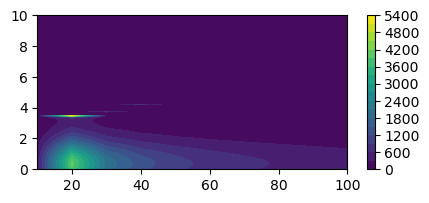

In [13]:
plt.contourf(R, z, grid, levels=20)
plt.colorbar()

#### testing interpolation

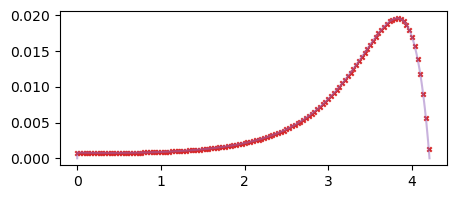

In [17]:
data = fits.open(os.path.join(direc, contents[3]))[0].data
zp = data[0]
fp = data[1]
z_trun = np.array([i for i in z if (i < np.max(zp))])

test_output = np.interp(z_trun, zp, fp)
test_output[0] = test_output[1]

plt.plot(zp, fp, c='C4', label='true', alpha=0.5)
plt.scatter(z_trun, test_output, marker='x', s=10, c='C3', label='interpolated')

In [22]:
fp.shape

(2500001,)

In [14]:
rp = R
grid_new = np.empty((N+1, P+1))
for i in range(N+1):
    dp = grid[i]
    itp_output = np.interp(R_grid, rp, dp)
    grid_new[i] = itp_output

In [15]:
grid_new

array([[3.80317884e+02, 3.80317884e+02, 3.80317884e+02, ...,
        4.38546035e+02, 4.30622052e+02, 4.22575492e+02],
       [3.80317884e+02, 3.80317884e+02, 3.80317884e+02, ...,
        4.38546035e+02, 4.30622052e+02, 4.22575492e+02],
       [3.83956125e+02, 3.83956125e+02, 3.83956125e+02, ...,
        4.42741394e+02, 4.34741594e+02, 4.26618046e+02],
       ...,
       [3.05812389e-01, 3.05812389e-01, 3.05812389e-01, ...,
        3.25976472e-01, 3.23100105e-01, 3.20179243e-01],
       [3.04381859e-01, 3.04381859e-01, 3.04381859e-01, ...,
        3.24380977e-01, 3.21528967e-01, 3.18632838e-01],
       [3.02965836e-01, 3.02965836e-01, 3.02965836e-01, ...,
        3.22801925e-01, 3.19973978e-01, 3.17102285e-01]])

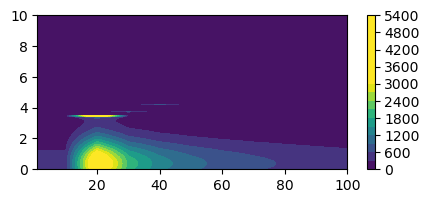

In [16]:
plt.contourf(R_grid, z, grid_new, levels=20, vmax=3000)
plt.colorbar()

(3.0, 4.0)

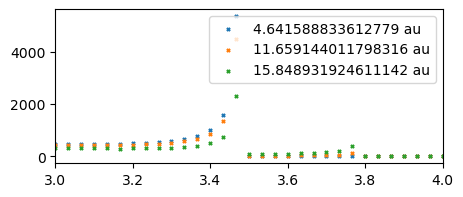

In [219]:
r_idx_ls = [100, 160, 180]

for i in r_idx_ls:
    plt.scatter(z, grid_new[:,i], marker='x', s=5, label=f'{R_grid[i]} au')

plt.legend()
plt.xlim(3,4)